In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
from pandas import Series
from scipy import stats
from scipy.stats import kstest
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt

data = pd.read_csv("Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#null 확인 및 제거
np.sum(pd.isnull(data))
country = data["Country"]
lifeExpect = data["Life_expect"]
countrylifeExpect = pd.concat([country,lifeExpect],axis=1)
countrylifeExpect = countrylifeExpect.dropna()
print(np.sum(pd.isnull(countrylifeExpect)))
print(countrylifeExpect)

Country        0
Life_expect    0
dtype: int64
          Country  Life_expect
0     Afghanistan         65.0
1     Afghanistan         59.9
2     Afghanistan         59.9
3     Afghanistan         59.5
4     Afghanistan         59.2
...           ...          ...
2933     Zimbabwe         44.3
2934     Zimbabwe         44.5
2935     Zimbabwe         44.8
2936     Zimbabwe         45.3
2937     Zimbabwe         46.0

[2928 rows x 2 columns]


In [3]:
#country 별 'life_expect 갯수'
grouped_cToe = countrylifeExpect["Life_expect"].groupby(countrylifeExpect["Country"])
print("size: \n",grouped_cToe.size())

#country 별 '평균 life_expect'
grouped_cToe_mean = grouped_cToe.mean()
print("mean: \n",grouped_cToe_mean)

size: 
 Country
Afghanistan                           16
Albania                               16
Algeria                               16
Angola                                16
Antigua and Barbuda                   16
                                      ..
Venezuela (Bolivarian Republic of)    16
Viet Nam                              16
Yemen                                 16
Zambia                                16
Zimbabwe                              16
Name: Life_expect, Length: 183, dtype: int64
mean: 
 Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zi

          Country  Life_expect
0     Afghanistan         65.0
1     Afghanistan         59.9
2     Afghanistan         59.9
3     Afghanistan         59.5
4     Afghanistan         59.2
...           ...          ...
2933     Zimbabwe         44.3
2934     Zimbabwe         44.5
2935     Zimbabwe         44.8
2936     Zimbabwe         45.3
2937     Zimbabwe         46.0

[2938 rows x 2 columns]


<AxesSubplot:xlabel='Country', ylabel='Life_expect'>

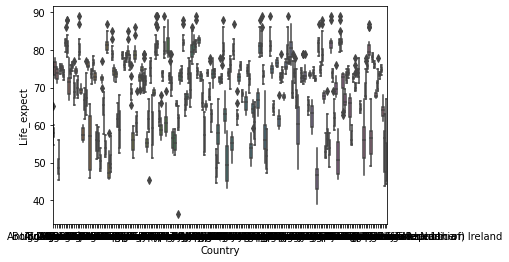

In [4]:
c_life = data[["Country","Life_expect"]]
print(c_life)

# 나라별 기대수명 boxplot (나라별로 기대수명이 어떻게 분포되어있는지 확인하고자 했으나,, )
sns.boxplot(x="Country",y="Life_expect",data=c_life)

In [5]:
c_table= data.groupby('Country')['Life_expect'].agg(**{'mean_Life_expect':'mean'}).reset_index()
c_table

# 나라별 기대수명의 평균값 정렬 >> 일본이 기대수명의 평균값이 가장 높다.?

ctable_sort = c_table.sort_values(by=c_table.columns[1],ascending=False)
ctable_sort 

,Country,mean_Life_expect
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
...,...,...
124,Niue,NaN
128,Palau,NaN
142,Saint Kitts and Nevis,NaN
146,San Marino,NaN


In [6]:
# mean_Life_expect 값이 Nan 으로 나온 country 확인

data.loc[data['Life_expect'].isna()]

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [7]:
# 기대수명을 확인할 수 없기 때문에 데이터 제거

data2=data.dropna(subset = ['Life_expect'])
data2

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='Country', ylabel='Life_expect'>

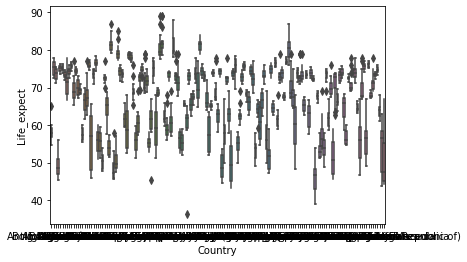

In [8]:
##developing country와 developed country의 life expect의 boxplot 분포에 차이가 있을까?

#developing country (개발도상국) boxplot 확인해보니 life expect가 약 40~90으로 넓게 분포되어있는것을 확인
developing_country = data2.loc[data2["Status"]=="Developing"]
developing_country

sns.boxplot(x="Country",y="Life_expect",data=developing_country)

In [9]:
developing_country.head(20)

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


<AxesSubplot:xlabel='Country', ylabel='Life_expect'>

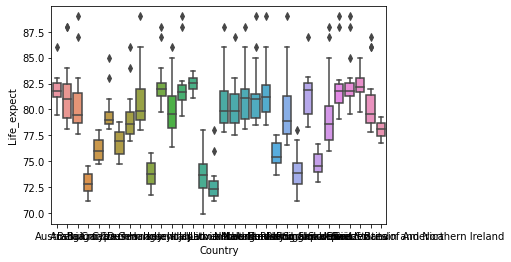

In [10]:
#developed country (선진국) boxplot 확인해보니 life expect가 70이상으로 분포되어있는것을 확인

developed_country = data2.loc[data2["Status"]=="Developed"]
developed_country

sns.boxplot(x="Country",y="Life_expect",data=developed_country)

In [11]:
#각 Country 별 15개의 년도 가지고 보는건 좀 아니다...

In [12]:
#developing country (개발도상국) boxplot 과 developed country (선진국) boxplot 을 통해 큰 outliers가 없는 것을 확인.
#평균을 통해 정확한 차이를 알아보자.
#developing country (개발도상국)의 Country별 평균
developing_country_grouped = developing_country["Life_expect"].groupby(developing_country["Country"])
developing_country_grouped_mean = developing_country_grouped.mean()
developing_country_grouped_mean

Country
Afghanistan                           58.19375
Albania                               75.15625
Algeria                               73.61875
Angola                                49.01875
Antigua and Barbuda                   75.05625
                                        ...   
Venezuela (Bolivarian Republic of)    73.38750
Viet Nam                              74.77500
Yemen                                 63.86250
Zambia                                53.90625
Zimbabwe                              50.48750
Name: Life_expect, Length: 151, dtype: float64

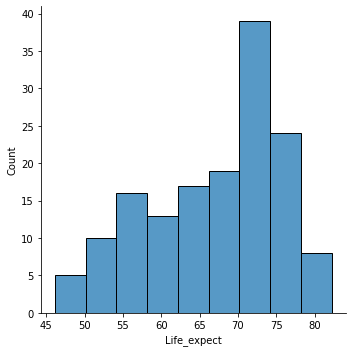

In [13]:
sns.displot(developing_country_grouped_mean)

In [14]:
#developed country (선진국)의 Country별 평균
developed_country_grouped = developed_country["Life_expect"].groupby(developed_country["Country"])
developed_country_grouped_mean = developed_country_grouped.mean()

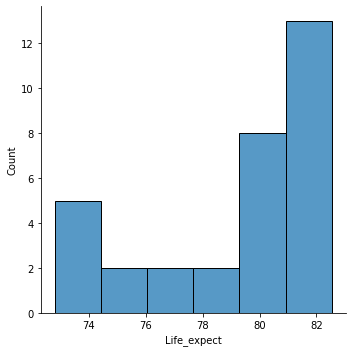

In [15]:
sns.displot(developed_country_grouped_mean)

In [16]:
#developing country (개도국)의 전체 Country 평균
print("developing country 의 평균은 %.3f 이다." % developing_country_grouped_mean.mean())

developing country 의 평균은 67.111 이다.


In [17]:
#developed country (선진국)의 전체 Country 평균
print("developed country 의 평균은 %.3f 이다." % developed_country_grouped_mean.mean())

developed country 의 평균은 79.198 이다.


In [18]:
mean_diff = developed_country_grouped_mean.mean() - developing_country_grouped_mean.mean()
print("평균만 보았을 때, developing country와 developed country의 평균 수명 차이가 %.3f 세 만큼 난다." % (mean_diff))

평균만 보았을 때, developing country와 developed country의 평균 수명 차이가 12.086 세 만큼 난다.


In [19]:
# 2000~2015년의 자료를 통째로 평균 내버리는 것은, 시간에 따른 기대수명 변화 정도를 무시한 것이다.
# 그러니 가장 최근 자료인 2015년의 자료만 추출하여,
# 개도국과 선진국의 차이를 비교해보자.

In [28]:
developed_country_2015 = developed_country.loc[developed_country["Year"]==2015]
developed_country_2015

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.0,93.0,74,...,93.0,NaN,93.0,0.1,56554.387600,23789338.0,0.6,0.6,0.937,20.4
128,Austria,2015,Developed,81.5,65.0,0,NaN,0.0,93.0,309,...,93.0,NaN,93.0,0.1,43665.947000,8633169.0,1.9,2.1,0.892,15.9
240,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,99.0,NaN,99.0,0.1,4356.875000,11274196.0,1.0,1.0,0.895,16.6
384,Bulgaria,2015,Developed,74.5,137.0,0,NaN,0.0,92.0,0,...,91.0,NaN,91.0,0.1,6993.477360,7177991.0,1.9,1.8,0.792,15.0
641,Croatia,2015,Developed,78.0,95.0,0,NaN,0.0,94.0,206,...,94.0,NaN,94.0,0.1,11579.667400,42364.0,1.5,1.4,0.823,15.3
673,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,...,97.0,NaN,97.0,0.1,2375.112700,116985.0,1.0,1.0,0.854,14.3
689,Czechia,2015,Developed,78.8,86.0,0,NaN,0.0,97.0,9,...,97.0,NaN,97.0,0.1,NaN,NaN,1.8,1.8,NaN,NaN
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,...,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2
994,Germany,2015,Developed,81.0,68.0,2,NaN,0.0,88.0,2464,...,94.0,NaN,95.0,0.1,41176.881580,81686611.0,1.1,1.1,0.924,17.1
1154,Hungary,2015,Developed,75.8,134.0,0,NaN,0.0,NaN,0,...,99.0,NaN,99.0,0.1,12365.626300,984328.0,1.6,1.6,0.834,15.6


In [29]:
#2015년 선진국의 평균
developed_country_2015_life = developed_country_2015["Life_expect"]
print("2015년도 선진국의 평균은 %.3f 이다." % developed_country_2015_life.mean())

2015년도 선진국의 평균은 80.709 이다.


In [30]:
developing_country_2015 = developing_country.loc[developing_country["Year"]==2015]
developing_country_2015

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.000000,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.000000,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.000000,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.000000,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [23]:
#2015년 개도국의 평균
developing_country_2015_life = developing_country_2015["Life_expect"]
print("2015년도 개도국의 평균은 %.3f 이다." % developing_country_2015_life.mean())

2015년도 개도국의 평균은 69.690 이다.


In [24]:
#2015년 선진국의 평균
mean2015_diff = developed_country_2015_life.mean() - developing_country_2015_life.mean()
print("평균만 보았을 때, developing country와 developed country의 평균 수명 차이가 %.3f 세 만큼 난다." % (mean2015_diff))

평균만 보았을 때, developing country와 developed country의 평균 수명 차이가 11.019 세 만큼 난다.


In [25]:
#결론 ; 전체 데이터나 2015년의 데이터나, 둘 다 선진국이 개도국에 비해 10세 이상 기대수명이 더 크다.

In [26]:
#Q 개도국과 선진국의 차이를 평균으로 알아보았는데, 평균값으로 단정 지어도 될까?

In [31]:
#개도국의 2015년 자료
data_2015_developing = data_2015.loc[data_2015["Status"]=="Developing"]

data_2015_developing_sort = data_2015_developing.sort_values(by=data_2015_developing.columns[3],ascending=False)
data_2015_developing_sort.head(10)["Life_expect"].mean()

NameError: name 'data_2015' is not defined

In [40]:
#선진국의 2015년 자료
data_2015_developed = data_2015.loc[data_2015["Status"]=="Developed"]
data_2015_developed_sort = data_2015_developed.sort_values(by=data_2015_developed.columns[3],ascending=False)
data_2015_developed_sort.head(10)["Life_expect"].mean()

NameError: name 'data_2015' is not defined

In [41]:
top10_diff = data_2015_developed_sort.head(10)["Life_expect"].mean() - data_2015_developing_sort.head(10)["Life_expect"].mean()
print("개도국과 선진국의 상위 10개 나라만 비교해 보았을 때, %.3f 정도 차이가 난다. " % top10_diff)
print("본 수치는, 앞서 구한 개도국과 선진국을 평균으로 비교한 차이인 10년이상 이라는 수치보다 월등히 작다.")
print("사실상 개도국과 선진국은 그리 많이 차이 난다고 볼 수 없다.")
#A : 별 차이가 없다.
####이렇게 결론 내봐도 괜찮을까? ㅎㅎㅋㅋㅋ

NameError: name 'data_2015_developed_sort' is not defined

In [42]:
# Q : Year이 변화될 수록, 어느 나라에서 기대수명이 많이 증가했을까?

In [43]:
#Year의 변화는 2000년과 2015년으로 비교해보자.


In [5]:
#outiler 제거 tool
dataex=data.dropna()
q3 = dataex["Alcohol"].quantile(0.75)
q1 = dataex["Alcohol"].quantile(0.25)
iqr = q3 - q1
def isOutiler(data):
    df = data["Alcohol"]
    if (df >= q3 + (5*iqr)) | (df <= q3 - (5*iqr)):
        return True
    else :
        return False
    
dataex["이상치"] = dataex.apply(isOutiler,axis=1)
dataex=dataex.loc[dataex["이상치"] == False]

C:\Users\LG\AppData\Local\Temp/ipykernel_12696/4018142782.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataex["이상치"] = dataex.apply(isOutiler,axis=1)


In [6]:
#Life_expect(기대 수명) normality check
data_1 = data_1.dropna()
print(kstest(data_1["Life_expect"],'norm'))
_,pvalue = stats.shapiro(data_1["Life_expect"])
print(pvalue)

#qqplot
qqplot(data["Life_expect"],line="s")
plt.show()
# p 값이 둘 다 작으므로, 정규성을 띈다는 가설을 기각할 수 있다. (정규분포 아님)

#Income_composition_of_resources 별 Life_expect(기대 수명) equal variance test
_,p = bartlett(data_icr["Life_expect"][data_icr["구간"]=="0-0.2"],
               data_icr["Life_expect"][data_icr["구간"]=="0.2-0.4"],
               data_icr["Life_expect"][data_icr["구간"]=="0.4-0.6"],
               data_icr["Life_expect"][data_icr["구간"]=="0.6-0.8"],
               data_icr["Life_expect"][data_icr["구간"]=="0.8-1.0"])
print(p)

#status 별 Life_expect(기대 수명) equal variance test
_,pv = levene(data_1["Life_expect"][data_1["Status"]=="Developing"],
               data_1["Life_expect"][data_1["Status"]=="Developed"])
print(pv)

#Income_composition_of_resources/status 별 Life_expect(기대 수명) 둘 다 p 값이 작으므로, 등분산성을 띄지 않는다.

NameError: name 'data_1' is not defined

In [16]:
#알코올 null 확인 및 제거
print(np.sum(pd.isnull(data)))
d1 = data["Alcohol"]
d2 = data["Life_expect"]
data2_m = pd.concat([d1,d2],axis=1)
data2_m = data2_m.dropna()
print(np.sum(pd.isnull(data2_m)))
data2_m

Country                              0
Year                                 0
Status                               0
Life_expect                         10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64
Alcohol        0
Life_expect    0
dtype: int64


,Alcohol,Life_expect
0,0.01,65.0
1,0.01,59.9
2,0.01,59.9
3,0.01,59.5
4,0.01,59.2
...,...,...
2933,4.36,44.3
2934,4.06,44.5
2935,4.43,44.8
2936,1.72,45.3


(0.40487676112660204, 2.105874618577427e-108)
SpearmanrResult(correlation=0.4425045243057327, pvalue=1.619742530659193e-131)


C:\Users\LG\AppData\Local\Temp/ipykernel_12696/3530735918.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datac["이상치"+i] = datac.apply(isOutiler,axis=1)


GDP
(0.3906465281517574, 6.460977882991552e-57)
SpearmanrResult(correlation=0.47276003076345285, pvalue=5.707661160293069e-86)
Total_expenditure
(0.1341443346560644, 1.4027224232835346e-07)
SpearmanrResult(correlation=0.23389685122677337, pvalue=1.909274445289559e-20)
percentage_expenditure
(0.4042494444318993, 3.445586262803534e-61)
SpearmanrResult(correlation=0.4791645659393535, pvalue=1.3707546398636382e-88)


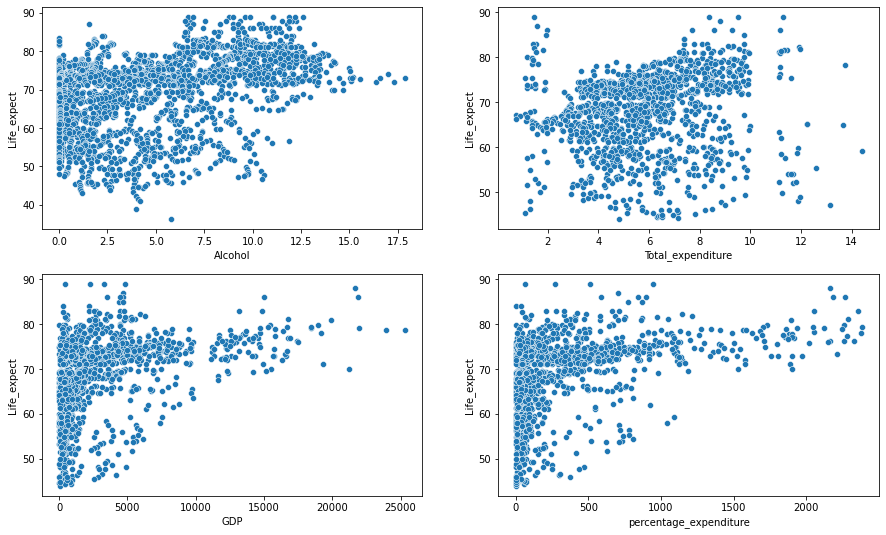

In [18]:
#상관 관계 조사
dims=(15,9)
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=dims)

#알코올에 따른 기대 수명 
q3 = data2_m["Alcohol"].quantile(0.75)
q1 = data2_m["Alcohol"].quantile(0.25)
iqr = q3 - q1
def isOutiler(data):
    df = data["Alcohol"]
    if (df >= q3 + (5*iqr)) | (df <= q3 - (5*iqr)):
        return True
    else :
        return False
data2_m["이상치"] = data2_m.apply(isOutiler,axis=1)
data2_m = data2_m.loc[data2_m["이상치"] == False]
#data2_m = data2_m.loc[data2_m["Alcohol"]>0.01]
sns.scatterplot(data=data2_m,x="Alcohol",y="Life_expect",ax=ax1)
fig
print(stats.pearsonr(data2_m["Alcohol"],data2_m["Life_expect"]))
print(stats.spearmanr(data2_m["Alcohol"],data2_m["Life_expect"]))


# GDP, Total_expenditure, percentage_expenditure에 따른 기대 수명
datac=data.dropna()
for i in ["GDP","Total_expenditure","percentage_expenditure"]:
    q3 = datac[i].quantile(0.75)
    q1 = datac[i].quantile(0.25)
    iqr = q3 - q1
    def isOutiler(data):
        df = data[i]
        if (df > q3 + (5*iqr)) | (df < q3 - (5*iqr)):
            return True
        else :
            return False
    datac["이상치"+i] = datac.apply(isOutiler,axis=1)
    datac=datac.loc[datac["이상치"+i] ==False]
sns.scatterplot(data=datac,x="Total_expenditure",y="Life_expect",ax=ax2)
sns.scatterplot(data=datac,x="GDP",y="Life_expect",ax=ax3)
sns.scatterplot(data=datac,x="percentage_expenditure",y="Life_expect",ax=ax4)
for i in ["GDP","Total_expenditure","percentage_expenditure"]:
    print(i)
    x = datac[i].values
    print(stats.pearsonr(x,datac["Life_expect"]))
    print(stats.spearmanr(x,datac["Life_expect"]))

#Life_expect와 Alcohol, GDP, Total_expenditure, percentage_expenditure들의 관계는 선형 계수가 positive이지만, strength가 week하기 때문에 h0기각하여 linear assosiation이 없다.

(0.7247759785960612, 0.0)
SpearmanrResult(correlation=0.8657015149223543, pvalue=0.0)
(0.7519754627366979, 0.0)
SpearmanrResult(correlation=0.8135410047690934, pvalue=0.0)


<AxesSubplot:xlabel='Schooling', ylabel='Life_expect'>

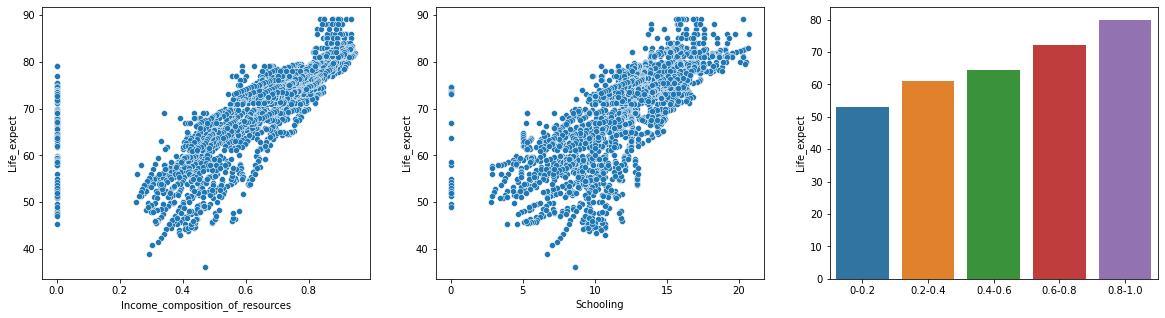

In [42]:
#상관 관계 분석 2
dims=(20,5)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=dims)

#Income_composition_of_resources(자원수입구성)과 기대 수명과의 관계 
data_icr = pd.concat([data["Life_expect"],data["Income_composition_of_resources"]],axis=1)
data_icr = data_icr.dropna()
icr = data_icr["Income_composition_of_resources"] 
print(stats.pearsonr(data_icr["Income_composition_of_resources"],data_icr["Life_expect"]))
print(stats.spearmanr(data_icr["Income_composition_of_resources"],data_icr["Life_expect"]))
sns.scatterplot(data=data_icr,x="Income_composition_of_resources",y="Life_expect",ax=ax1)
# p 값이 강한 양적 상관 관계를 갖는다. 

data_icr["구간"]=pd.cut(icr,bins=[0,0.2,0.4,0.6,0.8,1],labels=["0-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1.0"],right=False)
grouped_icr =data_icr["Life_expect"].groupby(data_icr["구간"]).mean('mean')
sns.barplot(x=["0-0.2","0.2-0.4","0.4-0.6","0.6-0.8","0.8-1.0"],y=data_icr["Life_expect"].groupby(data_icr["구간"]).mean().sort_values(),ax=ax3)
# 강한 양적 상관 관계, bar plot을 보았을 때 자원 수입 구성이 높을 수록 기대 수명이 큰 것을 볼 수 있다.

#schooling
data_sc = pd.concat([data["Life_expect"],data["Schooling"]],axis=1)
data_sc = data_sc.dropna()
sc = data_sc["Schooling"] 
print(stats.pearsonr(data_sc["Schooling"],data_sc["Life_expect"]))
print(stats.spearmanr(data_sc["Schooling"],data_sc["Life_expect"]))
sns.scatterplot(data=data_sc,x="Schooling",y="Life_expect",ax=ax2)
# p 값이 강한 양적 상관 관계를 갖는다. 학교를 오래 다닐 수록 기대 수명이 높다.

(0.7212507446094949, 0.0)
SpearmanrResult(correlation=0.7221023642188565, pvalue=0.0)


<AxesSubplot:xlabel='BMI', ylabel='Life_expect'>

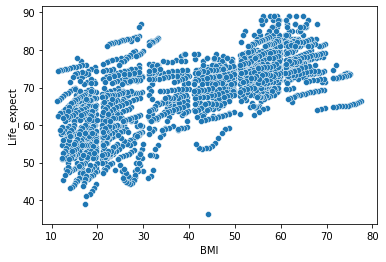

In [43]:
#상관 관계 조사 3
#BMI(체질량지수)와 기대 수명의 상관 관계 
data_bmi = pd.concat([data["Life_expect"],data["BMI"]],axis=1)
data_bmi = data_bmi.dropna()
data_bmi = data_bmi.loc[data_bmi["BMI"]>10] 
print(stats.pearsonr(data_bmi["BMI"],data_bmi["Life_expect"]))
print(stats.spearmanr(data_bmi["BMI"],data_bmi["Life_expect"]))
sns.scatterplot(data=data_bmi,x="BMI",y="Life_expect")

#BMI(10 under는 말이 안됨->삭제)와 기대 수명은 pearsonr,spearmanr testf를 통해 양적 상관 관계라는 결론을 내릴 수 있다. 강하고 양적인 상관 계수가 나왔으며, p_value가 작으므로 두 변수가
#association이 없다는 가설을 기각할 수 있다.

(0.25676194760492443, 4.562150143696096e-37)
SpearmanrResult(correlation=0.3501635715097011, pvalue=1.8370975190526576e-69)


<AxesSubplot:xlabel='Diphtheria', ylabel='Life_expect'>

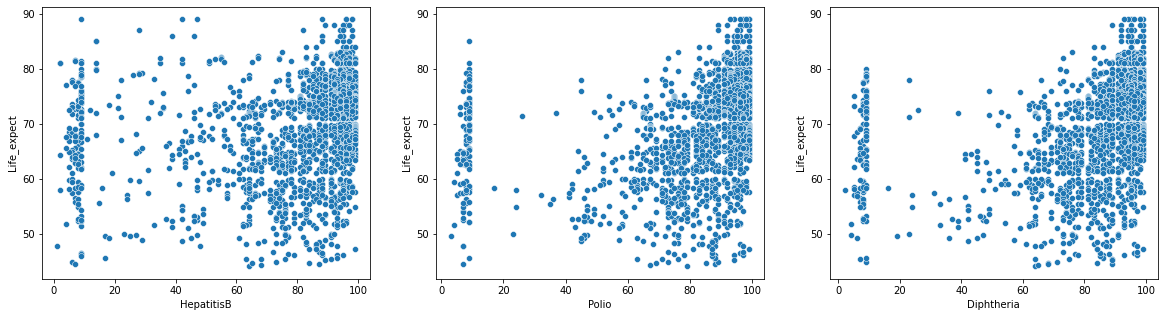

In [44]:
#HepatitisB,  Polio,  Diphtheria
dims=(20,5)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=dims)

data_bpd = pd.concat([data["Life_expect"],data["HepatitisB"],data["Polio"],data["Diphtheria"]],axis=1)
data_bpd = data_bpd.dropna()
print(stats.pearsonr(data_bpd["HepatitisB"],data_bpd["Life_expect"]))
print(stats.spearmanr(data_bpd["HepatitisB"],data_bpd["Life_expect"]))
sns.scatterplot(data=data_bpd,x="HepatitisB",y="Life_expect",ax=ax1)
sns.scatterplot(data=data_bpd,x="Polio",y="Life_expect",ax=ax2)
sns.scatterplot(data=data_bpd,x="Diphtheria",y="Life_expect",ax=ax3)

#예방접종 적용 범위에 따라 기대 수명이 높아지거나 낮아지지 않고, 골구루 분포해 있는 것을 볼 수 있다. 예방 접종과 기대 수명의 상관 관계는 없는 것으로 보인다.

In [45]:
print(stats.pearsonr(data_bpd["Polio"],data_bpd["Life_expect"]))
print(stats.spearmanr(data_bpd["Polio"],data_bpd["Life_expect"]))

(0.35783213515447454, 1.138239946908135e-72)
SpearmanrResult(correlation=0.453936321000346, pvalue=4.527031925718699e-121)


In [46]:
print(stats.pearsonr(data_bpd["Diphtheria"],data_bpd["Life_expect"]))
print(stats.spearmanr(data_bpd["Diphtheria"],data_bpd["Life_expect"]))

(0.3646231749354216, 1.3821538022967972e-75)
SpearmanrResult(correlation=0.46444944666269883, pvalue=2.1931183421278557e-127)


In [ ]:
'''
=> 기대 수명과 상관관계가 있는 것
BMI, Income_composition_of_resources, Schooling
BMI가 높을 수록 기대수명이 높은 건 좀 웃기네....
소득이 많을 수록 기대 수명 높은 건 좋네
학교 오래 다닐 수록 기대수명 높은 것도 좋네
'''

In [ ]:
'''
=> 기대 수명과 상관관계가 없는 것... 
Alchol 0.403 ??
percentage_expenditure ; 국내 총샌산(GDP)대비 건강 지출 비율 
0.404 , 0.479 ??
B형 간염 ok
Polio ; 소아마비 ok
Total_expenditure ; 총 정부 지출 대비 건강에 대한 정부 지출 
0.134 , 0.234 ???
Disphtheria ; 예방 접종 ... ok
GDP ; 인당 국내 총 생산 0.391 , 0.473 ??
'''

In [25]:
#모든 데이터를 다뤄서 그런 거 같으니...
#이상치를 제거한 Alchol과 Life_expeci
data2_m

,Alcohol,Life_expect,이상치
0,0.01,65.0,False
1,0.01,59.9,False
2,0.01,59.9,False
3,0.01,59.5,False
4,0.01,59.2,False
...,...,...,...
2933,4.36,44.3,False
2934,4.06,44.5,False
2935,4.43,44.8,False
2936,1.72,45.3,False


In [67]:
#2735 rows 중... random으로 500개만 뽑자...
data2_m_random500=data2_m.sample(500)
print(stats.pearsonr(data2_m_random500["Alcohol"],data2_m_random500["Life_expect"]))
print(stats.spearmanr(data2_m_random500["Alcohol"],data2_m_random500["Life_expect"]))
#그래도 상관관계 작네...
#2000개, 1000개, 100개 등 해봤는데 다 작다...

(0.3804944946247857, 1.136719392215822e-18)
SpearmanrResult(correlation=0.42033699171294, pvalue=7.975009949369604e-23)


In [68]:
#GDP,Total_expenditure,percentage_expenditure의 이상치를 제거한 데이터 datac
datac

,Country,Year,Status,Life_expect,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,HepatitisB,Measles,...,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,이상치GDP,이상치Total_expenditure,이상치percentage_expenditure
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,False,False,False
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,False,False
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,False,False
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,False,False
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,False,False,False
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,False,False,False
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,False,False,False
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,False,False,False


In [69]:
#1529 rows 중... random으로 500개만 뽑자...
datac_random500=datac.sample(500)
print(stats.pearsonr(datac_random500["GDP"],datac_random500["Life_expect"]))
print(stats.pearsonr(datac_random500["Total_expenditure"],datac_random500["Life_expect"]))
print(stats.pearsonr(datac_random500["percentage_expenditure"],datac_random500["Life_expect"]))
#그래도 상관관계 작네...
#건강에 대한 정부의 지출 비율과 기대수명과 관계가 없으면 우째...??

(0.3805024048105432, 1.134705913671797e-18)
(0.24198794923531966, 4.274659291676486e-08)
(0.4113080393322648, 7.811676104598085e-22)


In [74]:
#그럼... Total_expenditure(총 정부 지출 대비 건강에 대한 일반 정부 지출 (%))의 상위 100개만 뽑아서 보자.
test = datac.nlargest(100, 'Total_expenditure')
print(stats.pearsonr(test["Total_expenditure"],test["Life_expect"]))
#wowwwwww 건강에 많이 써도 기대수명에 영향을 안 준다규...?!
test['Total_expenditure']

(-0.3321302278404893, 0.0007357127691857122)


1496    14.39
1603    13.73
1386    13.66
2303    13.13
1573    12.60
        ...  
787      9.16
1605     9.16
1140     9.15
1342     9.15
2068     9.15
Name: Total_expenditure, Length: 100, dtype: float64

<AxesSubplot:xlabel='Total_expenditure', ylabel='Life_expect'>

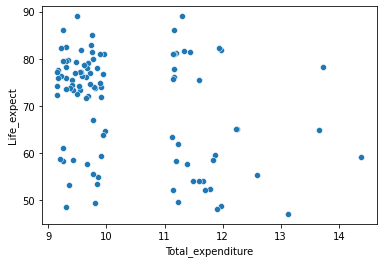

In [75]:
sns.scatterplot(data=test,x="Total_expenditure",y="Life_expect")